# Land Cover Data Collection
For land cover data collection we used [GAP/LANDFIRE National Terrestrial Ecosystems 2011](https://www.sciencebase.gov/catalog/item).
> The GAP/LANDFIRE National Terrestrial Ecosystems dataset includes detailed vegetation and land cover patterns for the continental United States. The data set incorporates the Ecological System classification system developed by NatureServe to represent natural and semi-natural vegetation. The 584 unique classes in the data set can be displayed at three levels of detail, from general (8 classes) to most detailed. The data set can be used to identify those places in the country with sufficient habitat to support wildlife, a key step in developing sound conservation plans. 
[**source**](https://www.usgs.gov/programs/gap-analysis-project/science/land-cover-data-overview)  
  
>> Citation: U.S. Geological Survey (USGS) Gap Analysis Project (GAP), 2016, GAP/LANDFIRE National Terrestrial Ecosystems 2011: U.S. Geological Survey data release, https://doi.org/10.5066/F7ZS2TM0.

The land cover data is a raster of GeoTIFF format, that covers the entire territory of the United States.  
![Land Cover](../../public/images/land_cover.png)  

There is also a very detailed attributes table with land cover type details:

In [1]:
# Import pandas
import pandas as pd

In [2]:
land_cover_types = pd.read_excel('../../data/raw/land_cover_attributes.xlsx', skiprows = [1]) # skipping first row because it's a sum count
land_cover_types.head(5)

Value    Count      RED    GREEN     BLUE  CL          NVC_CLASS   SC  \
0      1   382166  0.00000  0.51765  0.49020   1  Forest & Woodland  1.A   
1      2   976706  0.00000  0.51765  0.49020   1  Forest & Woodland  1.A   
2      3   726902  0.00000  0.51765  0.49020   1  Forest & Woodland  1.A   
3      4  2875688  0.11765  0.87843  0.62353   1  Forest & Woodland  1.A   
4      5     8327  0.16863  0.82745  0.20784   1  Forest & Woodland  1.A   

                    NVC_SUBCL    FRM                         NVC_FORM  \
0  Tropical Forest & Woodland  1.A.4  Tropical Flooded & Swamp Forest   
1  Tropical Forest & Woodland  1.A.4  Tropical Flooded & Swamp Forest   
2  Tropical Forest & Woodland  1.A.4  Tropical Flooded & Swamp Forest   
3  Tropical Forest & Woodland  1.A.5                         Mangrove   
4  Tropical Forest & Woodland  1.A.1   Tropical Dry Forest & Woodland   

        DIV                                            NVC_DIV MACRO_CD  \
0  1.A.4.Ed  Caribbean-Central American Flooded & Swamp Forest     M617   
1  1.A.4.Ed  Caribbean-Central American Flooded & Swamp Forest     M617   
2  1.A.4.Ed  Caribbean-Central American Flooded & Swamp Forest     M617   
3  1.A.5.Ua         Atlantic-Caribbean & East Pacific Mangrove     M005   
4  1.A.1.Ea                  Caribbean-Mesoamerican Dry Forest     M134   

                               NVC_MACRO    GR  \
0                        Caribbean Swamp  G002   
1                        Caribbean Swamp  G002   
2                        Caribbean Swamp  G002   
3  Western Atlantic & Caribbean Mangrove  G004   
4   Caribbean Coastal Lowland Dry Forest  G765   

                                           NVC_GROUP  LEVEL3  \
0                            Caribbean Lowland Swamp    9238   
1                            Caribbean Lowland Swamp    9702   
2                            Caribbean Lowland Swamp    9305   
3                          Caribbean Fringe Mangrove    9236   
4  Caribbean Hardwood Hammock & Coastal Strand Fo...    4132   

                            ECOLSYS_LU               NVCMES  
0          South Florida Bayhead Swamp  1.A.4.Ed M617G002E1  
1           South Florida Cypress Dome  1.A.4.Ed M617G002E2  
2  South Florida Dwarf Cypress Savanna  1.A.4.Ed M617G002E3  
3         South Florida Mangrove Swamp   1.A.5.UaM005G004E4  
4       South Florida Hardwood Hammock   1.A.1.EaM134G765E5

To get the land cover categories for wildfire locations I did some preprocessing in open source GIS software [QGIS](https://www.qgis.org/en/site/). During data collection, I first converted raster resolution (pixel size) from 30 meters to 1 kilometer, so the most frequent (mode) category of original land cover was assigned to a cell of a lower resolution dataset.
   
Source Resolution:   
![Initial Resolution](../../public/images/land_cover_source_resolution.png)  
Processed Resolution. 
![Initial Resolution](../../public/images/land_cover_processed_resolution.png)  
  
Then, based on the spatial intersection of wildfire locations and land cover values, I generated a dataset with two columns: fire id and land cover category in the given location. 

In [3]:
# Some short preprocessing needed here:
# Due to QGIS ids assignment logic, where indexing starts with 1, I need to shift ids back by 1 so they match all other datasets. I'm also going to make column names more concise.
# And I have to convert land cover classes to integers because they are classes, not numeric continuous values.
import pandas as pd

landcover_points = pd.read_csv('../../data/raw/landcover_points_raw.csv')
landcover_points

fid  Reprojected
0          1        474.0
1          2        489.0
2          3        187.0
3          4        557.0
4          5        462.0
...      ...          ...
21536  21537        158.0
21537  21538        461.0
21538  21539        583.0
21539  21540        360.0
21540  21541        472.0

[21541 rows x 2 columns]

In [4]:
# Fixing columns names
landcover_points.columns = ['fire_id', 'landcover_class']

# Correcting fire id column
landcover_points['fire_id'] = landcover_points['fire_id'] - 1

# Some of the fires were outside US so they didn't match any land cover categories. 
# Dropping those
landcover_points = landcover_points.dropna()

# land_cover_class: Converting floats to integers since they're classes
landcover_points['landcover_class'] = landcover_points['landcover_class'].astype(int)

/var/folders/33/gxsl6tm53sl1wjmxq6vld6c80000gn/T/ipykernel_28711/3633084977.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  landcover_points['landcover_class'] = landcover_points['landcover_class'].astype(int)


In [5]:
# Saving processed dataset
landcover_points.to_csv('../../data/cleaned/landcover.csv', index = False)

/var/folders/33/gxsl6tm53sl1wjmxq6vld6c80000gn/T/ipykernel_28711/652519692.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  landcover_points.landcover_class.value_counts()[:5].plot(kind = 'bar', color = '#D62F29');


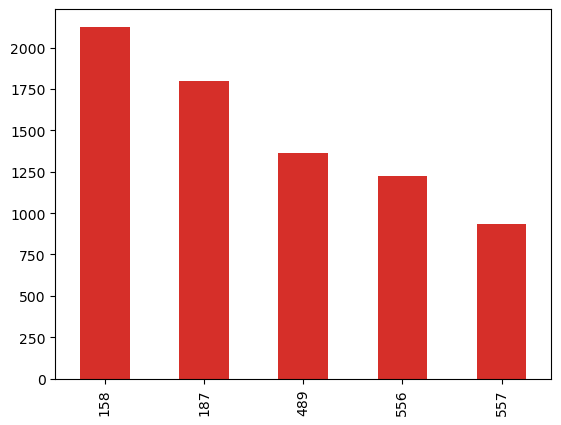

In [6]:
# Looking at most frequent categories
landcover_points.landcover_class.value_counts()[:5].plot(kind = 'bar', color = '#D62F29');

In [7]:
# Checking which categories these are
land_cover_types[land_cover_types.Value.isin([158, 187, 489, 556, 557])]

Value       Count       RED     GREEN     BLUE  CL  \
157    158    54321585  0.000000  0.388240  0.07843   1   
186    187   107223349  0.349020  0.490200  0.08627   1   
488    489   187305620  0.811760  0.819610  0.65882   3   
555    556  1532431380  0.960784  0.960784  0.86275   7   
556    557   655777154  0.996080  0.996080  0.75686   7   

                               NVC_CLASS   SC  \
157                    Forest & Woodland  1.B   
186                    Forest & Woodland  1.B   
488                 Desert & Semi-Desert  3.B   
555  Agricultural & Developed Vegetation  7.B   
556  Agricultural & Developed Vegetation  7.B   

                                NVC_SUBCL    FRM  \
157  Temperate & Boreal Forest & Woodland  1.B.2   
186  Temperate & Boreal Forest & Woodland  1.B.2   
488    Cool Semi-Desert Scrub & Grassland  3.B.1   
555    Herbaceous Agricultural Vegetation  7.B.1   
556    Herbaceous Agricultural Vegetation  7.B.2   

                                      NVC_FORM       DIV  \
157           Cool Temperate Forest & Woodland  1.B.2.Nb   
186           Cool Temperate Forest & Woodland  1.B.2.Nc   
488         Cool Semi-Desert Scrub & Grassland  3.B.1.Ne   
555  Row & Close Grain Crop Cultural Formation     7.B.1   
556                   Pasture & Hay Field Crop     7.B.2   

                                               NVC_DIV MACRO_CD  \
157    Rocky Mountain Cool Temperate Forest & Woodland     M022   
186  Western North American Cool Temperate Woodland...     M027   
488  Western North American Cool Semi-Desert Scrub ...     M169   
555                 Herbaceous Agricultural Vegetation    7.B.1   
556                           Pasture & Hay Field Crop    7.B.2   

                                             NVC_MACRO     GR  \
157       Southern Rocky Mountain Lower Montane Forest   G228   
186  Southern Rocky Mountain & Colorado Plateau Two...   G250   
488  Great Basin-Intermountain Tall Sagebrush Stepp...   G302   
555                 Herbaceous Agricultural Vegetation  7.B.1   
556                           Pasture & Hay Field Crop  7.B.2   

                                             NVC_GROUP  LEVEL3  \
157  Southern Rocky Mountain Ponderosa Pine Forest ...    4530   
186         Colorado Plateau Pinyon - Juniper Woodland    4512   
488  Intermountain Mesic Tall Sagebrush Steppe & Sh...    5706   
555          Row & Close Grain Crop Cultural Formation    1402   
556                           Pasture & Hay Field Crop    1403   

                                          ECOLSYS_LU                NVCMES  
157  Southern Rocky Mountain Ponderosa Pine Woodland  1.B.2.NbM022G228E158  
186         Colorado Plateau Pinyon-Juniper Woodland  1.B.2.NcM027G250E187  
488    Inter-Mountain Basins Big Sagebrush Shrubland  3.B.1.NeM169G302E489  
555                              Cultivated Cropland               7.AE556  
556                                      Pasture/Hay               7.AE557

Land cover dataset has 164 unique classes.